# K-Means, Iris

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
iris = pd.read_csv('datasets/iris.csv')

In [35]:
iris.shape

(150, 6)

In [36]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df = iris.iloc[:, 1:3]
df.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = ss.fit_transform(df)

In [39]:
df[:10]

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536]])

In [40]:
from sklearn.cluster import KMeans

km = KMeans(3)
km.fit(df)

C:\Users\049\anaconda3\envs\myml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [41]:
pred = km.predict(df)

In [42]:
df_temp = pd.DataFrame(df)

df_temp['cluster'] = pred
df_temp.head()

,0,1,cluster
0,-0.900681,1.032057,2
1,-1.143017,-0.124958,2
2,-1.385353,0.337848,2
3,-1.506521,0.106445,2
4,-1.021849,1.263460,2


In [43]:
df_temp['Species'] = iris['Species']
df_temp.head()

,0,1,cluster,Species
0,-0.900681,1.032057,2,Iris-setosa
1,-1.143017,-0.124958,2,Iris-setosa
2,-1.385353,0.337848,2,Iris-setosa
3,-1.506521,0.106445,2,Iris-setosa
4,-1.021849,1.263460,2,Iris-setosa


In [44]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
df_temp['Species'] = encoder.fit_transform(df_temp['Species']) 

In [45]:
df_temp.head(100)

,0,1,cluster,Species
0,-0.900681,1.032057,2,0
1,-1.143017,-0.124958,2,0
2,-1.385353,0.337848,2,0
3,-1.506521,0.106445,2,0
4,-1.021849,1.263460,2,0
...,...,...,...,...
95,-0.173674,-0.124958,0,1
96,-0.173674,-0.356361,0,1
97,0.432165,-0.356361,1,1
98,-0.900681,-1.281972,0,1


In [47]:
df_temp.columns=['A', 'B', 'C', 'D']

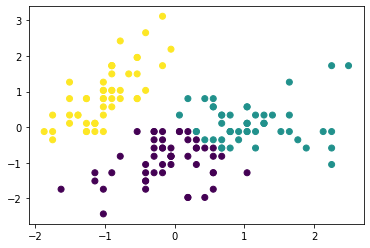

In [48]:
plt.scatter(df_temp['A'], df_temp['B'], c=df_temp['C'])
plt.show()

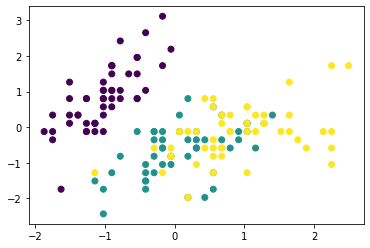

In [49]:
plt.scatter(df_temp['A'], df_temp['B'], c=df_temp['D'])
plt.show()

In [52]:
ins = []

for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=2022)
    km.fit(df)
    ins.append(km.inertia_)

C:\Users\049\anaconda3\envs\myml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\049\anaconda3\envs\myml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\049\anaconda3\envs\myml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\049\anaconda3\envs\myml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known

In [53]:
ins

[168.3926219836109,
 103.80692090161442,
 79.71916925065548,
 61.730827145295294,
 52.153997466265444,
 44.824573566972354,
 36.79742228421278,
 30.717356775893805]

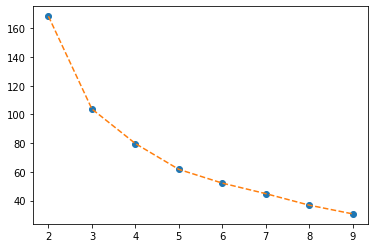

In [57]:
plt.plot(np.arange(2,10), ins, 'o')
plt.plot(np.arange(2,10), ins, '--')
plt.show()

In [58]:
#!pip install yellowbrick

     -------------------------------------- 274.2/274.2 kB 4.2 MB/s eta 0:00:00


In [60]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\049\anaconda3\envs\myml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\049\anaconda3\envs\myml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\049\anaconda3\envs\myml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\049\anaconda3\envs\myml\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known

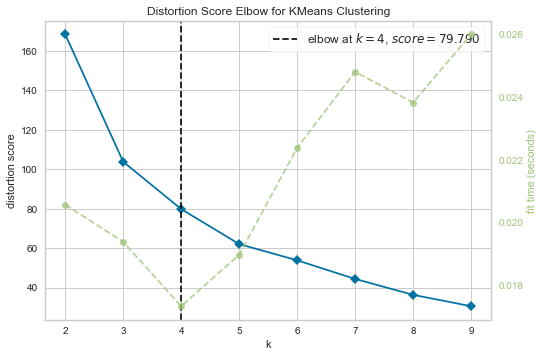

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
vs = KElbowVisualizer(model, k=(2,10))
vs.fit(df)
vs.show()